In [4]:
import re
with open("E:\\vocabulary.txt", 'r',encoding="utf-8") as f:
    read_data = f.readlines()
voc_list=[]
for line in read_data:
    voc1 = re.search('词汇.*?sound.', line)
    if type(voc1) == re.Match:       #只有在匹配有结果的时候才将结果放入voc_list
        voc2list = re.split("\<\!\-\-anki\-\-\>|;|\<b\>|\<div\>|\[sound\:|\</b\>|&nbsp|\(|\)",voc1.group().split("\t")[1].split(" ")[0])
        for voc2 in voc2list:
            if voc2 != "" and voc2 !=" " :
                voc_list.append(voc2)
print(len(voc_list))
print(voc_list[2])

6132
humanity


In [ ]:
import pandas as pd
frame = pd.read_excel("E:\\COCA.xlsx","Sheet1")
# print(frame.columns)
# print(frame[" word"].head())

In [ ]:
match_list = []
for i in voc_list:
    # 第一次找出匹配的词汇
    match_result = frame[frame[" word"].str.contains("  " + i)].index.tolist()
    # 找出字符串完全匹配的词汇
    if match_result != []:
        for j in match_result:
            if "  " + i == frame[" word"][j]:
                match_list.append(j)
# 词汇表索引去重并且排序
match_list2=list(set(match_list))
match_list2.sort()

> COCA词汇占有率

In [ ]:
def search_top(num):
    count=0
    for i in match_list2 :
        if i <= num :
            count+=1
    return count

import matplotlib.pyplot as plt

# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

nums = ('10000', '20000', "30000", '40000', '50000',"60000")
buy_number = [search_top(10000),search_top(20000),search_top(30000),search_top(40000),search_top(50000),search_top(60000)]

plt.bar(nums, buy_number)
plt.title('COCA词汇占有率')

plt.show()

> 词汇分类占比

16624215 17394869 19702696 18232464 19549613


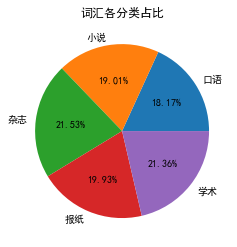

In [35]:
SPOKEN = 0
FICTION = 0
MAGAZINE = 0
NEWSPAPER = 0
ACADEMIC = 0

for i in match_list2:
    SPOKEN = SPOKEN + frame["SPOKEN"][i]
    FICTION = FICTION + frame["FICTION"][i]
    MAGAZINE = MAGAZINE + frame["MAGAZINE"][i]
    NEWSPAPER = NEWSPAPER + frame["NEWSPAPER"][i]
    ACADEMIC = ACADEMIC + frame["ACADEMIC"][i]

print(SPOKEN,FICTION,MAGAZINE,NEWSPAPER,ACADEMIC)

import numpy as np  
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

labels=['口语','小说','杂志','报纸','学术']
X=[SPOKEN,FICTION,MAGAZINE,NEWSPAPER,ACADEMIC]  

fig = plt.figure()
plt.pie(X,labels=labels,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("词汇各分类占比")
plt.show()  

Enter password: ········
Verify password: ········


'argon2:$argon2id$v=19$m=10240,t=10,p=8$uuGJs4ayb0alg+DS0FyA0g$z9ihv0MIEK5Ng1p8RGkj2g'